<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/multiclassclassificationfashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classification
* It means predicting between more then two classes
* It also means preeding between more then 100 differen classes

# getting the data ready

In [1]:
import tensorflow as tf


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Bringing the first two elements of training and testing sample

In [3]:
print(f'training sample{train_data[0]}')
print()
print(f'training lable{train_labels[0]}')

training sample[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

# Checking the shape


In [4]:
print('train data shape is ',train_data[0].shape)
print('train lable shape is ',train_labels[0].shape)

train data shape is  (28, 28)
train lable shape is  ()


## ploting a single sample for train data and train labels

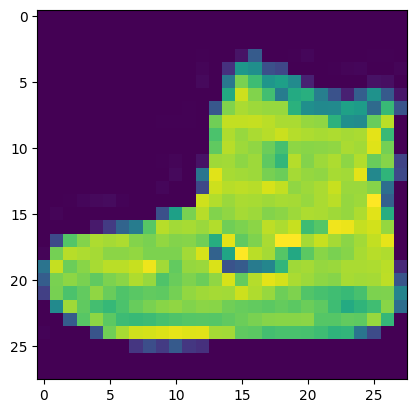

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])


In [6]:
print(train_labels[0])

9


## we will create a list so whenever we print an label istad of number we get the clothtypename

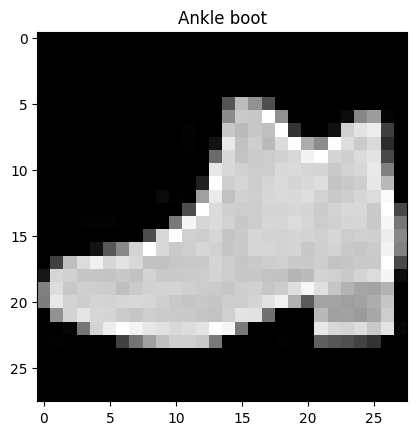

In [7]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Assuming train_labels contains the numeric labels of the training set
# And train_data contains the image data

# Displaying the first image in the dataset with its corresponding label
plt.imshow(train_data[15],cmap='gray')
plt.title(class_labels[train_labels[15]])
plt.show()

#ploting multile images

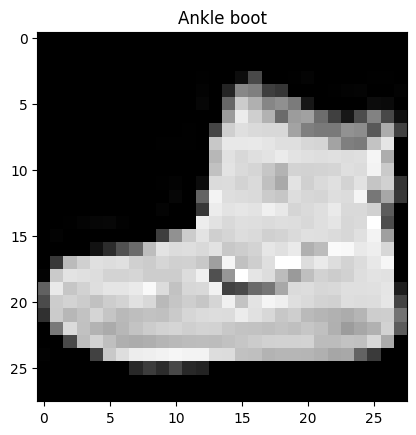

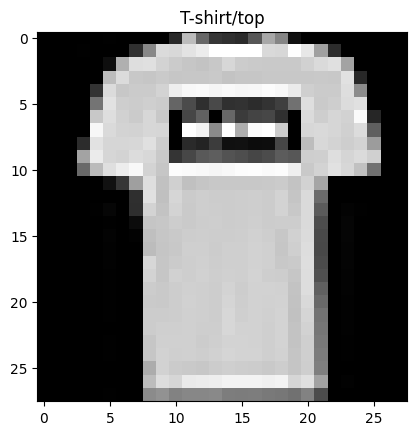

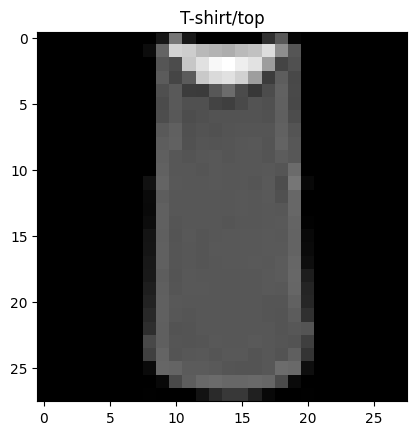

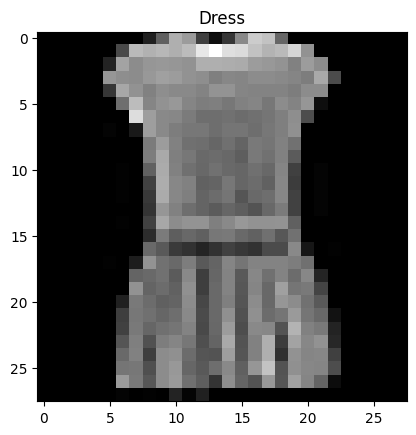

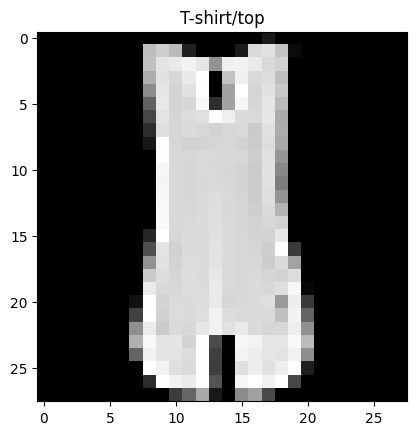

In [8]:
import matplotlib.pyplot as plt

def display_images_with_labels(images, labels, class_labels, num_images=15):
    """
    Display multiple images with their corresponding labels.

    Parameters:
        images (list): List of image data.
        labels (list): List of numeric labels corresponding to the images.
        class_labels (list): List of class labels corresponding to the numeric labels.
        num_images (int): Number of images to display. Default is 5.
    """
    for i in range(num_images):
        plt.imshow(images[i], cmap='gray')
        plt.title(class_labels[labels[i]])
        plt.show()

# Example usage:
# Assuming train_data contains the image data
# and train_labels contains the numeric labels of the training set
# class_labels contains the corresponding class labels
display_images_with_labels(train_data, train_labels, class_labels, num_images=5)


# Creating the classification model
* Note
* 1 flatten the inut layers first as we need to convert multimensonal array to one dimensional array in order to pass them to convolutional networks
* 2 that if we pass labels interms of integers we  have to use sparsecrossentropy else we need to one hot encode the data

In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy']
)

history=model.fit(train_data,train_labels,epochs=10,verbose=0,validation_data=(test_data,test_labels))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.7728 - accuracy: 0.1966


[1.772787094116211, 0.19660000503063202]

# Normalizing the data
* Do that by finding the maximum number
* And then divide the data with it



In [21]:
import pandas as pd

In [12]:
# Finding the maximum and minimum number
print('minimum',train_data.min())
print('maximum',train_data.max())

minimum 0
maximum 255


In [13]:
#now normalizing the data
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [14]:
#Now chck min and max values in norm data
print('minimum for new trained data',train_data_norm.min())
print('maximum for new trained data',train_data_norm.max())

minimum for new trained data 0.0
maximum for new trained data 1.0


# improving the model

In [36]:
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy']
)

history_norm=model2.fit(train_data_norm,train_labels,epochs=15,verbose=0,validation_data=(test_data_norm,test_labels))

In [38]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 100)               78500     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model2.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5174 - accuracy: 0.8458


[0.5173740983009338, 0.84579998254776]

# comparing the loss curves

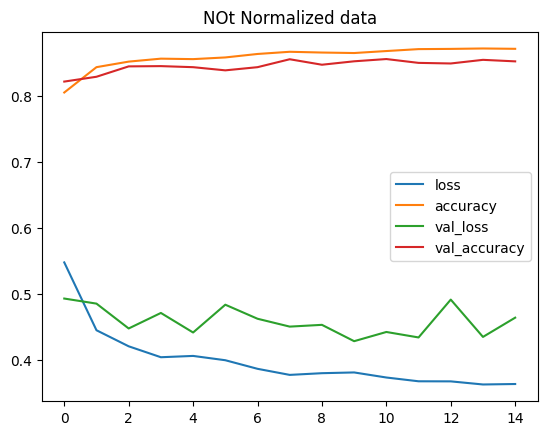

In [40]:
history_pd=pd.DataFrame(history.history)
history_pd.plot()
plt.title('NOt Normalized data')
plt.show()


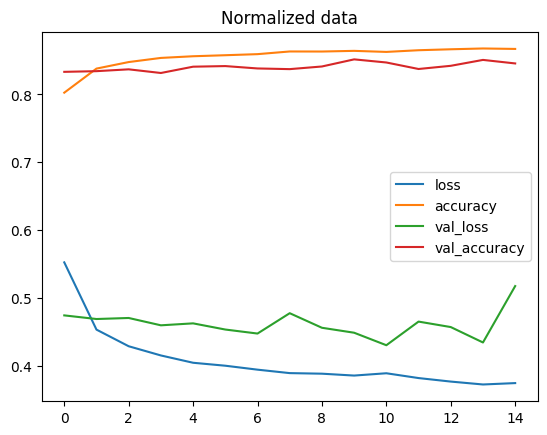

In [41]:
history_pd=pd.DataFrame(history_norm.history)
history_pd.plot()
plt.title('Normalized data')
plt.show()

# finding ideal learning rate

In [44]:
model3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy']
)
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

history_new=model.fit(train_data_norm,train_labels,epochs=40,verbose=0,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

In [45]:
model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 4)                 3140      
                                                                 
 dense_37 (Dense)            (None, 4)                 20        
                                                                 
 dense_38 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model3.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 2.2894 - accuracy: 0.0988


[2.2894184589385986, 0.09880000352859497]

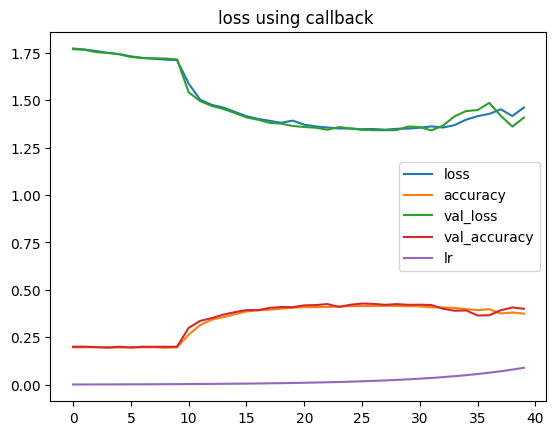

In [47]:
history_pd=pd.DataFrame(history_new.history)
history_pd.plot()
plt.title('loss using callback ')
plt.show()

In [49]:
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy']
)

history_norm=model2.fit(train_data_norm,train_labels,epochs=20,verbose=0,validation_data=(test_data_norm,test_labels))

In [50]:
model2.evaluate(test_data_norm,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4779 - accuracy: 0.8416


[0.4779203534126282, 0.8416000008583069]

# confusion matrix

313/313 [==============================] - 0s 2ms/step


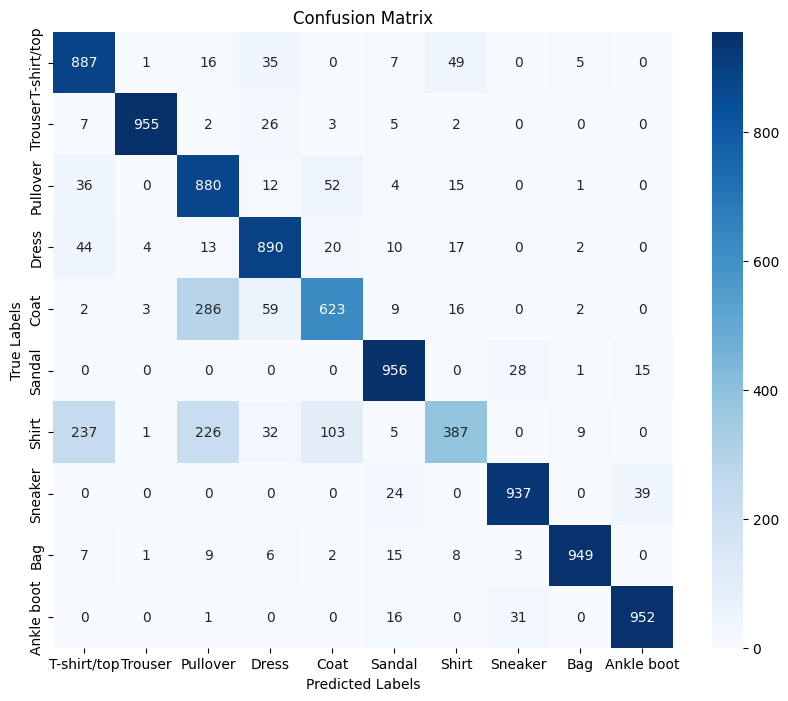

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions for the test dataset
predictions = model2.predict(test_data_norm)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot confusion matrix with class labels
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




# makeing a funcion that becomes green if predictions are correct and red if they are not

1/1 [==============================] - 0s 20ms/step


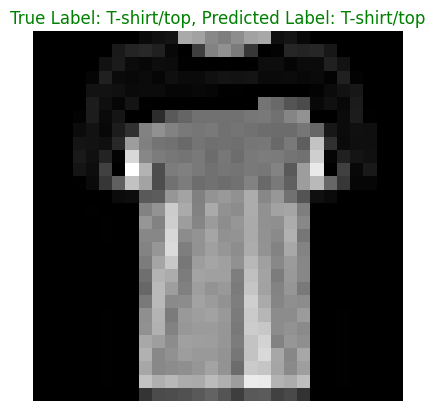

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def plot_prediction(model, dataset, labels, class_labels):
    """
    Plot a randomly selected image from the dataset along with its true and predicted labels.

    Args:
        model (tf.keras.Model): Trained model for making predictions.
        dataset (numpy.ndarray): Dataset containing images.
        labels (numpy.ndarray): True labels corresponding to the images in the dataset.
        class_labels (list): List of class labels.

    Returns:
        None
    """
    # Randomly select an image from the dataset
    random_index = np.random.randint(0, len(dataset))
    image = dataset[random_index]
    true_label = labels[random_index]

    # Make prediction on the selected image
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    # Determine label color based on prediction correctness
    label_color = 'green' if true_label == predicted_label else 'red'

    # Add true and predicted labels to the plot
    plt.title(f'True Label: {class_labels[true_label]}, Predicted Label: {class_labels[predicted_label]}', color=label_color)
    plt.show()

# Usage:

plot_prediction(model2, test_data_norm, test_labels, class_labels)


In [59]:
def count_predictions(model, dataset, labels):
    # Make predictions on the dataset
    predictions = model.predict(dataset)
    predicted_labels = np.argmax(predictions, axis=1)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(labels, predicted_labels)

    # Calculate total correct and wrong predictions
    total_correct = np.trace(conf_matrix)
    total_wrong = np.sum(conf_matrix) - total_correct

    return total_correct, total_wrong


total_correct, total_wrong = count_predictions(model2, test_data_norm, test_labels)
print("Total Correct Predictions:", total_correct)
print("Total Wrong Predictions:", total_wrong)

313/313 [==============================] - 1s 3ms/step
Total Correct Predictions: 8416
Total Wrong Predictions: 1584


# Accuracy of the model

In [66]:
total_samples = total_correct + total_wrong
total_accuracy = (total_correct / total_samples) * 100

print("Total Accuracy of the Model:", total_accuracy)



Total Accuracy of the Model: 84.16


In [68]:
model2.layers